# **Classical Algorithm : Deep Residual Networks (ResNets)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.models import Model

In [ ]:
# Mounting the dataset
dataset_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# Handling missing values by filling with the mean of the column
data.fillna(data.mean(), inplace=True)

# Features and target
target_column = 'log_bh_mass'
feature_columns = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
    'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i',
    'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50',
    'mendel_logMb_p16', 'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16',
    'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r',
    'simard_e_b_t_r', 'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g',
    'simard_Rchl_r', 'simard_Re', 'simard_e_Re', 'simard_e', 'simard_e_e',
    'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

In [ ]:
X = data[feature_columns]
y = data[target_column]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Building the ResNet model
def resnet_block(input_tensor, units):
    x = Dense(units, activation='relu')(input_tensor)
    x = Dense(units, activation=None)(x)
    x = Add()([x, input_tensor])
    x = tf.keras.layers.ReLU()(x)
    return x

inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = Dense(1)(x)

model = Model(inputs, x)
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=32, verbose=1)

Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 13.2653 - val_loss: 1.3519
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0462 - val_loss: 0.6065
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4671 - val_loss: 0.4645
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4018 - val_loss: 0.4067
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3264 - val_loss: 0.3188
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5568 - val_loss: 0.2849
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2522 - val_loss: 0.4862
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4537 - val_loss: 0.2505
Epoch 9/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3058 - val_loss: 0.2721
Epoch 10/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2609 - val_loss: 0.2525
Epoch 11/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2062 - val_loss: 0.2530
Epoch 12/100
222/222 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)

# Calculate error metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

range_y = y.max() - y.min()
mae_accuracy = (1 - mae / range_y) * 100
mse_accuracy = (1 - mse / range_y) * 100
rmse_accuracy = (1 - rmse / range_y) * 100

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

print(f'MAE Accuracy: {mae_accuracy:.2f}%')
print(f'MSE Accuracy: {mse_accuracy:.2f}%')
print(f'RMSE Accuracy: {rmse_accuracy:.2f}%')

R²: 0.7700
MAE: 0.2092
MSE: 0.0931
RMSE: 0.3051
MAE Accuracy: 95.85%
MSE Accuracy: 98.15%
RMSE Accuracy: 93.95%


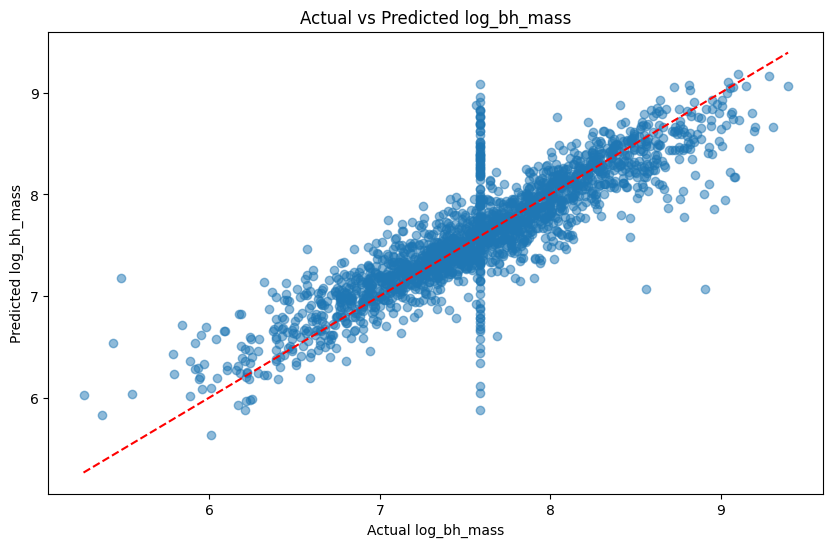

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.show()